In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as Cosmology
from astropy import units as u 
from astropy import constants as const
from astropy.coordinates import SkyCoord
from ipynb.fs.full.Dataframe_GOALS import *
import math
from IPython.display import display
import pandas as pd

,Name,RA,Dec,Redshift,D_L [Mpc],log(LIR),LIR_unc x 1e11,AGNbol,AGNbol_unc,SFR [M$_{\odot}$],un-corr SFR [M$_{\odot}$],Supernova rate [yr$^{-1}$],un-corr Supernova rate [yr$^{-1}$],Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$],Flux(TeV) no AGN [GeV cm$^{-2}$ s$^{-1}$]
0,NGC0023,00h09m53.32s,+25d55m26.2s,0.01523,65.2,11.11,0.05,0.09,0.04,22.30,24.50,0.24,0.27,6.330000e-12,6.950000e-12
1,NGC0034a,00h11m06.59s,-12d06m25.5s,0.01962,84.1,11.50,0.08,0.04,0.02,57.74,60.15,0.63,0.66,9.850000e-12,1.026000e-11
2,MCG-02-01-051a,00h18m50.87s,-10d22m36.6s,0.02722,117.5,11.67,0.09,0.07,0.05,82.41,88.61,0.90,0.97,7.230000e-12,7.770000e-12
3,ESO350-IG038,00h36m52.20s,-33d33m20.8s,0.02060,89.0,11.28,0.09,0.23,0.09,27.53,35.76,0.30,0.40,4.250000e-12,5.520000e-12
4,NGC0232a,00h42m45.80s,-23d33m42.0s,0.02217,95.2,11.48,0.30,0.09,0.03,51.55,56.65,0.57,0.63,6.960000e-12,7.640000e-12
5,NGC0232b,00h42m52.78s,-23d32m28.9s,0.02217,95.2,10.64,0.05,0.47,0.06,4.33,8.16,0.05,0.09,5.900000e-13,1.100000e-12
6,MCG+12-02-001,00h54m03.48s,+73d05m03.8s,0.01570,69.8,11.49,0.06,0.06,0.04,54.51,57.99,0.60,0.64,1.368000e-11,1.455000e-11
7,NGC0317B,00h57m40.41s,+43d47m32.9s,0.01811,77.8,11.23,0.04,0.05,0.02,30.47,32.08,0.34,0.35,6.110000e-12,6.440000e-12
8,IC1623AB,01h07m47.49s,-17d30m27.1s,0.02007,85.5,11.73,0.09,0.12,0.04,89.43,101.63,0.98,1.12,1.483000e-11,1.685000e-11
9,MCG-03-04-014,01h10m08.98s,-16d51m09.7s,0.03349,144.0,11.62,0.10,0.07,0.04,73.03,78.53,0.81,0.87,4.290000e-12,4.610000e-12


<Figure size 720x648 with 0 Axes>

In [3]:
from ipynb.fs.full.Diffuse_IceCube_nb import *


In [18]:
Ee= 1e3


Arp220_1 = Flux(Ee, 250, 500, 1000,150, 4.0, 1e8, 4.53,87.9)
Arp220_2 = Flux(Ee, 250, 500, 1000,150, 4.48, 1e8, 4.53,87.9)
Arp299_1 = Flux(Ee, 250, 500, 1000,150, 4.0, 1e8, 0.48,50.7)
Arp299_2 = Flux(Ee, 250, 500, 1000,150, 4.11, 1e8,0.48,50.7)
NGC2146_1 = Flux(Ee, 250, 500, 1000,150, 4.0, 1e8, 0.28,17.5)
NGC2146_2 = Flux(Ee, 250, 500, 1000,150, 4.27, 1e8, 0.28,17.5)
NGC1068_1 = Flux(Ee, 250, 500, 1000,150, 4.00, 1e8, 0.52,15.9)
NGC1068_2 = Flux(Ee, 250, 500, 1000,150, 4.52, 1e8 ,0.52,15.9)


In [19]:
Dec_all = df['Dec'].to_numpy('str')
RA_all = df['RA'].to_numpy('str')
c = [SkyCoord(i,j) for i,j in zip(RA_all,Dec_all)]

Text(0, 0.5, 'Counts')

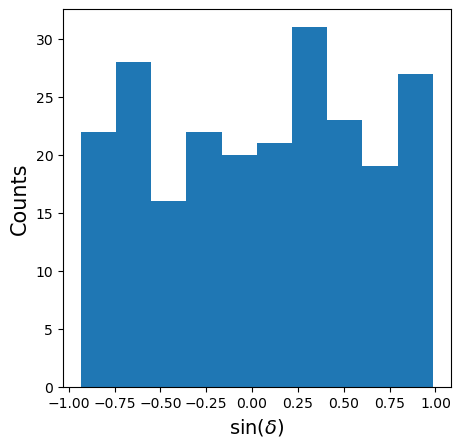

In [20]:
plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
c_rad_sin_all = np.sin([i.dec.rad for i in c  ]) #radians
c_RA_all = [i.ra.deg for i in c  ] #degrees
plt.hist(c_rad_sin_all,10)
plt.xlabel('sin($\\delta$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 15)

Text(0, 0.5, 'Counts')

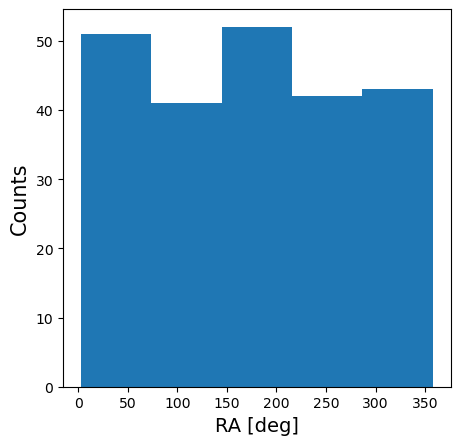

In [21]:
plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
plt.hist(c_RA_all,5)
plt.xlabel('RA [deg]', fontsize = 14)
plt.ylabel('Counts', fontsize = 15)

In [22]:
df_irg=  df[(df['log(LIR)'] < 11)  ]
df_lirg = df[(df['log(LIR)']>= 11) & (df['log(LIR)'] < 12) ]
df_ulirg = df[(df['log(LIR)']>= 12)  ]


In [23]:
Dec_irg = df_irg['Dec'].to_numpy('str')
Dec_lirg = df_lirg['Dec'].to_numpy('str')
Dec_ulirg = df_ulirg['Dec'].to_numpy('str')

RA_irg = df_irg['RA'].to_numpy('str')
RA_lirg = df_lirg['RA'].to_numpy('str')
RA_ulirg = df_ulirg['RA'].to_numpy('str')

FTeV_irg = df_irg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')
FTeV_lirg = df_lirg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')
FTeV_ulirg = df_ulirg['Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$]'].to_numpy('float')

c_irg = [SkyCoord(i,j) for i,j in zip(RA_irg,Dec_irg)]
c_lirg = [SkyCoord(i,j) for i,j in zip(RA_lirg,Dec_lirg)]
c_ulirg = [SkyCoord(i,j) for i,j in zip(RA_ulirg,Dec_ulirg)]

c_rad_sin_irg = np.sin([i.dec.rad for i in c_irg  ])
c_rad_sin_lirg = np.sin([i.dec.rad for i in c_lirg  ])
c_rad_sin_ulirg = np.sin([i.dec.rad for i in c_ulirg  ])

AGNfracs_irg = df_irg['AGNbol'].to_numpy()
AGNfracs_lirg = df_lirg['AGNbol'].to_numpy()
AGNfracs_ulirg = df_ulirg['AGNbol'].to_numpy()



N = df['Name'].to_numpy('str')

In [24]:
Sindec_IceCube_sens = np.loadtxt("sindec_10years")
Flux_IceCube_sens = np.loadtxt("Fluxsens_10years")

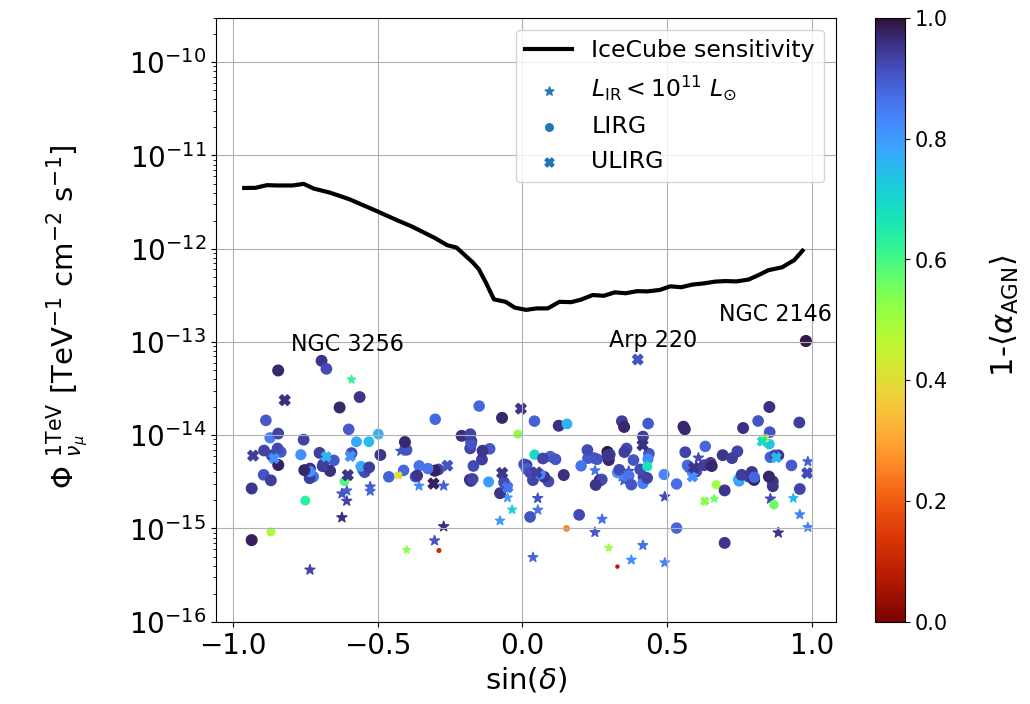

In [25]:
plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')


plt.grid()
plt.scatter(c_rad_sin_irg,FTeV_irg*(1e3/pow(1e3,2)),vmin=0,vmax=1,s = (1-AGNfracs_irg)*60 ,marker = '*', c = (1-AGNfracs_irg),cmap = "turbo_r", label = '$ L_{\mathrm{IR}} < 10^{11}~L_{\odot}$')
plt.scatter(c_rad_sin_lirg,FTeV_lirg*(1e3/pow(1e3,2)),vmin=0,vmax=1 , s = (1-AGNfracs_lirg)*60 , marker = 'o',c = (1-AGNfracs_lirg),cmap = "turbo_r", label = 'LIRG')
plt.scatter(c_rad_sin_ulirg,FTeV_ulirg*(1e3/pow(1e3,2)), vmin = 0, vmax = 1,s = (1-AGNfracs_ulirg)*60 ,marker='X',c = (1-AGNfracs_ulirg),cmap = "turbo_r", label = 'ULIRG')

plt.text(0.30,9e-14, s= 'Arp 220',fontsize = 16)
plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens, label = 'IceCube sensitivity',linewidth = 3, color = 'k')
plt.text(0.68, 1.7e-13, s= 'NGC 2146',fontsize = 16)
plt.text(-0.80,8e-14,s = 'NGC 3256',fontsize = 16)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=15) 


plt.ylim(1e-16,3e-10)
plt.yscale('log')
plt.xlabel('$\sin(\\delta$)',fontsize = 21)
plt.ylabel('\n $\\Phi~^{\mathrm{1TeV}}_{\\nu_\\mu}$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 21)
plt.yticks(fontsize = 20)
plt.xticks([-1.00, -0.50 , 0.0, 0.50, 1.00 ],fontsize = 20)
cb.set_label(label = '\n 1-$\\langle \\alpha_{\\mathrm{AGN}} \\rangle$', fontsize = 22)
plt.legend(fontsize = 17)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/fluxsindecpaper.pdf",bbox_inches="tight")



In [26]:
for i in np.arange(0,1,0.01):
    ngc1068_flux = Flux(1e3, 200, 500, 1000,150, 4.0, 1e8, (1-i)*0.51,15.9)
    ngc2146_flux = Flux(1e3, 200, 500, 1000,150, 4.0, 1e8, 0.28,17.5)
    if ngc1068_flux < ngc2146_flux:
        print("For alpha_AGN = ", i, " NGC1068 shows the strongest neutrino flux")
        break
    

For alpha_AGN =  0.55  NGC1068 shows the strongest neutrino flux


In [27]:
Arp220_dec = 23.503139 #deg
Arp220_sindec = np.sin(np.deg2rad(Arp220_dec))
Arp299_dec = 58.561944 #deg
Arp299_sindec = np.sin(np.deg2rad(Arp299_dec))
NGC1068_dec = -0.013281 #deg
NGC1068_sindec = np.sin(np.deg2rad(NGC1068_dec))
NGC2146_dec = 78.357028 #deg
NGC2146_sindec = np.sin(np.deg2rad(NGC2146_dec))

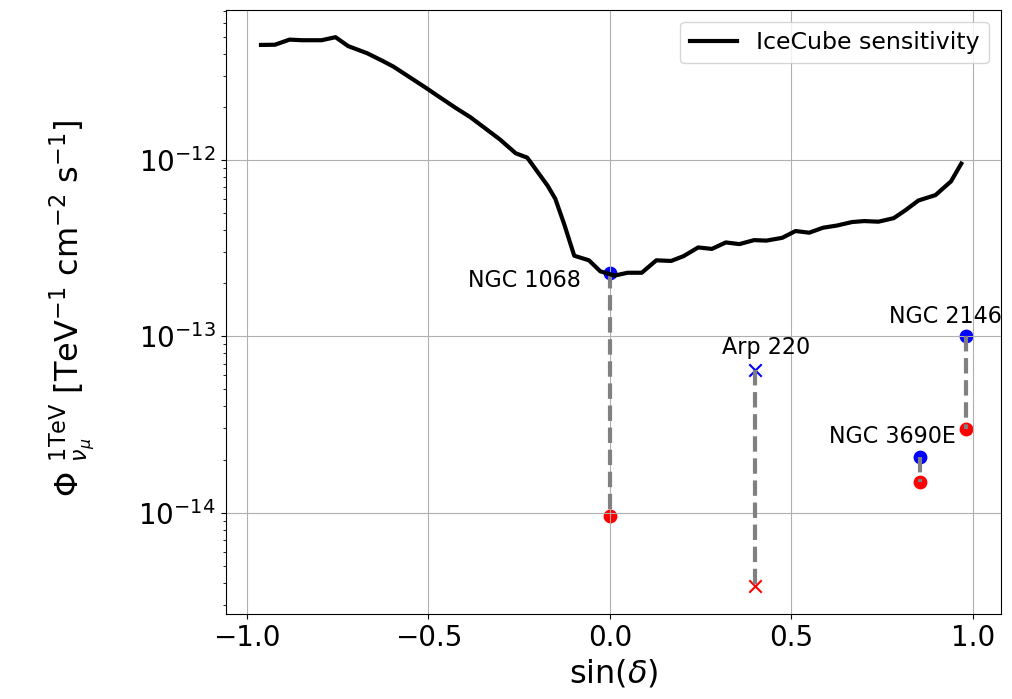

In [28]:

plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')

plt.scatter(Arp220_sindec, Arp220_1*(1e3/pow(1e3,2)), marker = 'x', c= 'b', s = 80)
plt.scatter(Arp220_sindec, Arp220_2*(1e3/pow(1e3,2)),marker = 'x', c= 'r',s = 80)
plt.vlines(Arp220_sindec, ymin = Arp220_1*(1e3/pow(1e3,2)), ymax= Arp220_2*(1e3/pow(1e3,2)),linestyle = '--',linewidth =3, color= 'grey')

plt.scatter(Arp299_sindec, Arp299_1*(1e3/pow(1e3,2)),marker = 'o', c= 'b', s= 80)
plt.scatter(Arp299_sindec, Arp299_2*(1e3/pow(1e3,2)),marker = 'o', c= 'r', s= 80)
plt.vlines(Arp299_sindec, ymin = Arp299_1*(1e3/pow(1e3,2)), ymax= Arp299_2*(1e3/pow(1e3,2)),linestyle = '--',linewidth =3, color= 'grey')


plt.scatter(NGC2146_sindec,NGC2146_1*(1e3/pow(1e3,2)), marker =  'o', c= 'b',s = 80)
plt.scatter(NGC2146_sindec,NGC2146_2*(1e3/pow(1e3,2)),marker = 'o', c= 'r', s= 80)
plt.vlines(NGC2146_sindec,ymin = NGC2146_1*(1e3/pow(1e3,2)), ymax = NGC2146_2*(1e3/pow(1e3,2)),linestyle = '--',linewidth =3, color= 'grey')


plt.scatter(NGC1068_sindec,NGC1068_1*(1e3/pow(1e3,2)),marker= 'o',c = 'b', s= 80)
plt.scatter(NGC1068_sindec,NGC1068_2*(1e3/pow(1e3,2)),marker= 'o',c = 'r', s= 80)
plt.vlines(NGC1068_sindec,ymin = NGC1068_1*(1e3/pow(1e3,2)), ymax = NGC1068_2*(1e3/pow(1e3,2)),linewidth =3, linestyle = '--',color= 'grey')


plt.grid()
plt.text(0.31, 8e-14, s= 'Arp 220',fontsize = 16)
plt.text(0.77, 1.2e-13, s= 'NGC 2146',fontsize = 16)
#plt.text(-0.1, 3.8e-13, s= 'NGC 1068', fontsize = 16)
plt.text(-0.39, 1.9e-13, s= 'NGC 1068', fontsize = 16)

plt.text(Arp299_sindec-0.25, 2.5e-14, s= 'NGC 3690E',fontsize = 16)


plt.plot(Sindec_IceCube_sens,Flux_IceCube_sens, label = 'IceCube sensitivity',linewidth = 3, color = 'k')
#plt.plot(Sindec_IceCube2_sens,Flux_IceCube2_sens, label = 'IceCube-Gen2 sensitivity',linestyle = '--',linewidth = 2)


plt.yscale('log')
plt.xlabel('$\sin(\\delta$)',fontsize = 23)
plt.ylabel('\n $\\Phi~^{\mathrm{1TeV}}_{\\nu_\\mu }$ [TeV$^{-1}$ cm$^{-2}$ s$^{-1}$] \n', fontsize = 23)
plt.yticks(fontsize = 20)
plt.xticks([-1.00, -0.50 , 0.0, 0.50, 1.00 ],fontsize = 20)
cb.set_label(label = '\n $\\langle \\alpha_{\\mathrm{AGN}} \\rangle$',weight='bold', fontsize = 20)
plt.legend(fontsize = 17)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Persource_variablegamma.pdf",bbox_inches="tight")




In [15]:
supernova_rate = df['Supernova rate [yr$^{-1}$] '].to_numpy('float')
uncorr_supernova_rate = df['un-corr Supernova rate [yr$^{-1}$] '].to_numpy('float')
luminosity_distance = df['D_L [Mpc]'].to_numpy('float')

In [ ]:
def diffuse_flux_prediction(Erange,sn,lumd,gammasn):
    nism = 1000
    R = 250
    H = 150
    v = 500
    plow = 0.001
    pup = 1e9 
    pmax = 1e8
    diffuse_flux = 0
    diffuse_flux_array = []
    for k in Erange:
        for i,j in zip(sn,lumd):
            diffuse_flux += Flux(k, R,v,nism,H, gammasn, pmax , i, j )
        diffuse_flux_array += [diffuse_flux]    
        diffuse_flux = 0
    return np.array(diffuse_flux_array)/(4*np.pi)



In [ ]:
Energy_range = np.logspace(np.log10(1.5e4),np.log10(5e6),12)


In [ ]:
diffuse_flux_gamma5 = diffuse_flux_prediction(Energy_range, supernova_rate,luminosity_distance, 4.5)


In [ ]:
diffuse_flux_gamma5_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4.5)


In [ ]:
diffuse_flux_gamma25 = diffuse_flux_prediction(Energy_range, supernova_rate, luminosity_distance, 4.25)


In [ ]:
diffuse_flux_gamma25_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4.25)

In [ ]:
diffuse_flux_gamma2 = diffuse_flux_prediction(Energy_range,supernova_rate, luminosity_distance, 4)

In [ ]:
diffuse_flux_gamma2_noAGN = diffuse_flux_prediction(Energy_range, uncorr_supernova_rate,luminosity_distance, 4)

In [ ]:
# Plot the HESE data up to index i
i = len(energy)
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
Energy_plot = np.logspace(np.log10(1.5e4),np.log10(5e6),12)

plt.plot(Energy_plot,diffuse_flux_gamma2_noAGN,color = 'blue',linestyle = '--',linewidth = 3)
plt.plot(Energy_plot,diffuse_flux_gamma2,color = 'blue', linewidth = 3)

plt.plot(Energy_plot,diffuse_flux_gamma25_noAGN, color = 'green', linestyle = '--', linewidth = 3)
plt.plot(Energy_plot,diffuse_flux_gamma25, color = 'green', linewidth = 3)

plt.plot(Energy_plot,diffuse_flux_gamma5_noAGN, color = 'darkorange',linestyle= '--', linewidth = 3)
plt.plot(Energy_plot,diffuse_flux_gamma5, color = 'darkorange', linewidth = 3)




HESE = plt.errorbar(energy[:i],
                   flux[:i],
                   xerr=[energy_lower_err[:i],energy_upper_err[:i]],
                   yerr=[flux_lower_err[:i],flux_upper_err[:i]],
                   uplims=upper_limits[:i],
                   marker="o",
                   markersize=0,
                   color="k",
                   linestyle="none",
                   linewidth=3,
                   capsize=0, label = 'HESE (7.5 years)')

plt.text(6e6,5e-11, s = '$\\gamma_{\mathrm{SN}} $ = 4.00', fontsize = 16,color = 'blue')
plt.text(6e6,2e-12, s = '$\\gamma_{\mathrm{SN}} $ = 4.25', fontsize = 16,color = 'green')
plt.text(6e6,3e-14, s = '$\\gamma_{\mathrm{SN}} $ = 4.50', fontsize = 16,color = 'darkorange')

en = np.arange(1e4,5e6,100)

# Plot the diffuse nu_mu best fit
plt.xscale('log')
plt.yscale('log')
numu_best = plt.plot(energy_range_numu,
                    flux_numu*energy_range_numu**2,
                    color="r",
                    linestyle=(0,(12,6,4,6,4,6)), label= '$\\nu_\\mu + \\bar{\\nu}_{\\mu}$ (9.5 years)') # dashdotdotted

# Plot the error band of the diffuse nu_mu best fit



numu_err = plt.fill_between(energy_numu,
                           flux_lower,
                           flux_upper,
                           color="r",
                           lw=0,
                           alpha=0.4)


plt.ylim(1e-14,1e-5)
plt.xlim(1e4,4e7)
plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 21)
plt.ylabel('E$_{\\nu_{\\mu}}^2$ $\\Phi ^{\\mathrm{diffuse}}_{\\nu_\\mu}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] \n', fontsize = 21)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.grid()
plt.savefig("/Users/yarno/Documents/PhD/Pictures/diffuseGOALS.pdf",bbox_inches="tight")
